In [2]:
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

Text(0.0, -400, '$b = (51 \\pm 3)$')

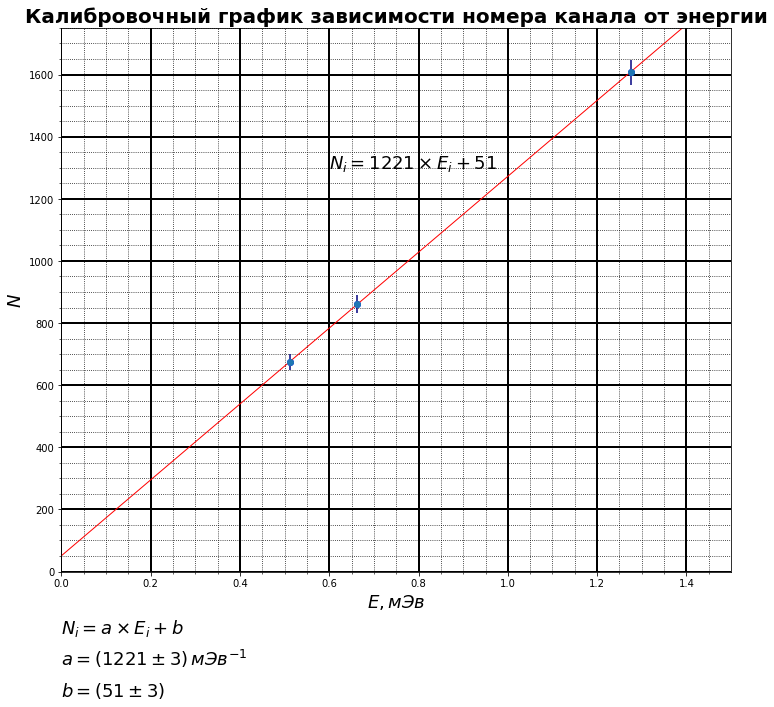

In [3]:
#calibration plot
Ni = np.array([1608, 674, 861], dtype = 'float')
Ni_err = Ni ** .5
Ei = np.array([1.275, .511, .662], dtype = 'float')
plt.plot(Ei, Ni, "bo")
plt.title("Калибровочный график зависимости номера канала от энергии", fontsize = 20, fontweight = 'bold')
fig = plt.gcf()
fig.set_size_inches(12, 10)
plt.errorbar(Ei, Ni, yerr = Ni_err, fmt='o', ecolor='navy')
model = sm.OLS(Ni, sm.add_constant(Ei))
res = model.fit()
params = res.params[::-1]
errors = res.bse[::-1]
straight_line = np.poly1d(params)
inter = np.linspace(0, 1.5, 100)
plt.plot(inter, straight_line(inter), "r", linewidth = '1')
ax = plt.gca()
ax.set_xlabel(r'$E, мЭв$', fontsize = 18)
ax.set_ylabel(r'$N$', fontsize = 18)
ax.set_xlim(0, 1.5)
ax.set_ylim(0, 1750)
ax.minorticks_on()
ax.grid(which='major',
        color = 'k', 
        linewidth = 2)
ax.grid(which='minor', 
        color = 'k', 
        linestyle = ':')
plt.text(.6, 1300, r'$N_{i} = %.0f \times E_{i} + %.0f$' % (params[0], params[1]), fontsize = 18)
plt.text(.0, -200, r'$N_{i} = a \times E_{i} + b$', fontsize = 18)
plt.text(.0, -300, r'$a = (%.0f \pm %.0f)\/мЭв^{-1}$' % (params[0], errors[0]), fontsize = 18)
plt.text(.0, -400, r'$b = (%.0f \pm %.0f)$' % (params[1], errors[1]), fontsize = 18)

Text(0, -0.01, '$k = (0.0036 \\pm 0.0003)\\/мЭв$')

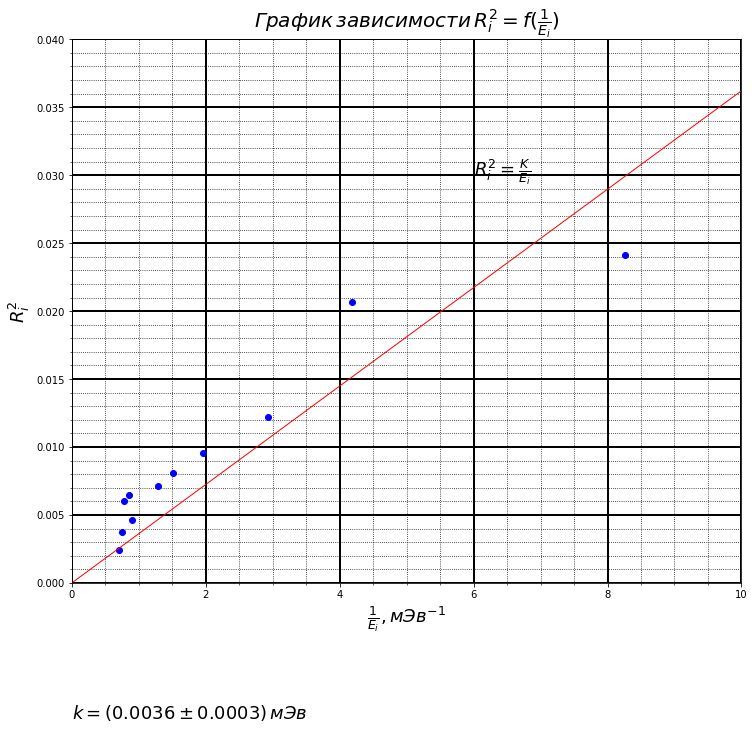

In [4]:
def E(N) :
    return (N - params[1])/params[0]
def N(E) :
    return (params[0]*E + params[1])
def dE(dN) :
    return dN/params[0]
N_i=np.array([1490, 1696, 861, 199, 343, 467, 997, 1408, 1798, 1608, 674], dtype = 'float')
dN_i=np.array([116, 101, 73, 23, 42, 46, 80, 92, 86, 121, 61], dtype = 'float')
E_i=E(N_i)
dE_i=dE(dN_i)
R_i=dE_i/E_i

plt.plot(1/E_i, R_i ** 2, "bo")
plt.title(r'$График\/зависимости\/R_{i}^{2} = f(\frac{1}{E_{i}})$', fontsize = 20, fontweight = 'bold')
fig = plt.gcf()
fig.set_size_inches(12, 10)
ax = plt.gca()
ax.minorticks_on()
ax.set_xlabel(r'$\frac{1}{E_{i}}, мЭв^{-1}$', fontsize = 18)
ax.set_ylabel(r'$R_{i}^{2}$', fontsize = 18)
ax.grid(which='major',
        color = 'k', 
        linewidth = 2)
ax.grid(which='minor', 
        color = 'k', 
        linestyle = ':')
ax.set_xlim(0, 10)
ax.set_ylim(0, .04)

m1 = sm.OLS(R_i ** 2, 1/E_i)
res1 = m1.fit()
param1 = res1.params[::-1]
error1 = res1.bse[::-1]
inter1 = np.linspace(0, 40, 100)
plt.plot(inter1, param1*inter1, "r", linewidth = '1')
plt.text(6, .03, r'$R_{i}^{2} = \frac{K}{E_{i}}$' % (param1), fontsize = 18)
plt.text(0, -.01, r'$k = (%.4f \pm %.4f)\/мЭв$' % (param1, error1), fontsize = 18)

In [17]:
E_max = E(1490)/(1+0.511/2*E(1490))#Co
print(E_max)
print(E(1166))
print(N_i)
print(E(N_i))
print(dE_i)
print(R_i)
print(E(120), dE(20), dE(20)/E(120))
print(E(91), dE(23), dE(23)/E(91))


0.9055649834163466
0.9128846251304468
[1490. 1696.  861.  199.  343.  467.  997. 1408. 1798. 1608.  674.]
[1.17815746 1.34681858 0.66316792 0.12115984 0.23905888 0.34058305
 0.77451701 1.11102051 1.4303304  1.27476917 0.51006292]
[0.09497422 0.08269307 0.05976826 0.0188311  0.03438722 0.03766219
 0.06549946 0.07532438 0.07041192 0.09906794 0.04994334]
[0.08061251 0.06139882 0.09012538 0.15542358 0.14384414 0.11058152
 0.08456814 0.06779747 0.04922773 0.07771442 0.09791604]
0.056479121864696 0.016374866219230417 0.2899277764703708
0.0327355658468119 0.01883109615211498 0.5752488360896603


In [50]:
E_max1 = E(861)/(1+0.511/2*E(861)) #Cs
print(E_max1)
print(E(742))

0.5670818974896935
0.5657374612827619


In [52]:
E_max2 = E(1608)/(1+0.511/2*E(1608)) #Na
print(E_max2)
print(N(E_max2))
print(E(1244))

0.9615793779465825
1225.474993156218
0.9767466033854454


Text(0.5, 0.3, '$c = (1.0198 \\pm 0.0084)\\/мЭв$')

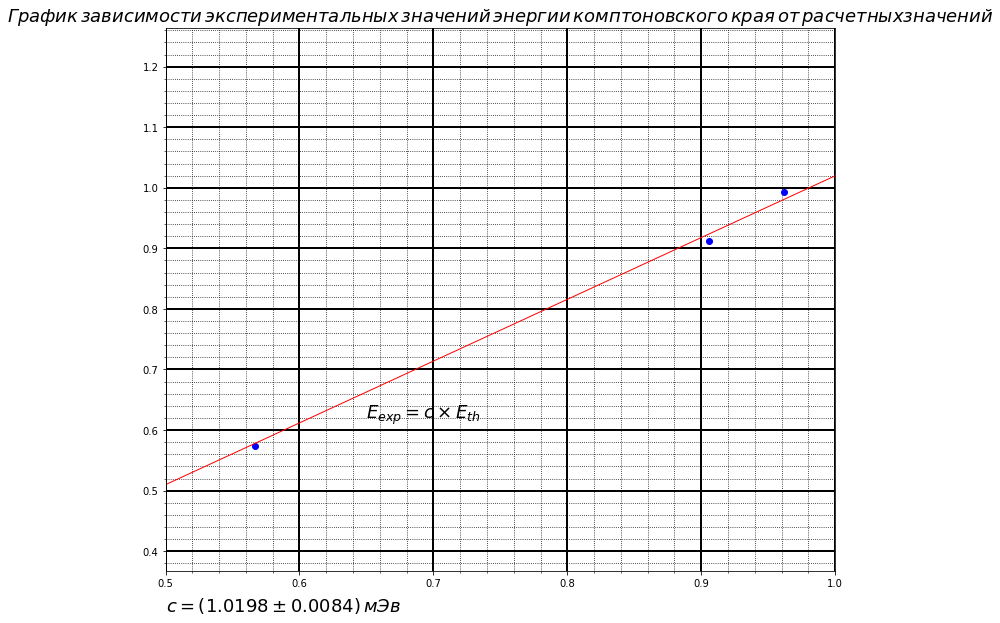

In [23]:
def Ek(N) :
    return E(N)/(1+0.511/2*E(N))
N_exp = np.array([1490, 861, 1608], dtype='float')
Ek_th = Ek(N_exp)
Nk_exp = np.array([1166, 752, 1264], dtype='float')
Ek_exp = E(Nk_exp)
plt.plot(Ek_th, Ek_exp, "bo")
plt.title(r'$График\/зависимости\/экспериментальных\/значений\/энергии\/комптоновского\/края\/от\/расчетных значений$', fontsize = 18, fontweight = 'bold')
fig = plt.gcf()
fig.set_size_inches(12, 10)
ax = plt.gca()
ax.minorticks_on()
ax.grid(which='major',
        color = 'k', 
        linewidth = 2)
ax.grid(which='minor', 
        color = 'k', 
        linestyle = ':')
ax.set_xlim(0.5, 1.)

m2 = sm.OLS(Ek_exp, Ek_th)
res2 = m2.fit()
param2 = res2.params[::-1]
error2 = res2.bse[::-1]
inter2 = np.linspace(0.4, 1.2, 5)
plt.plot(inter2, param2*inter2, "r", linewidth = '1')
plt.text(.65, .62, r'$E_{exp} = c \times E_{th}$' % (param2), fontsize = 18)
plt.text(.5, .3, r'$c = (%.4f \pm %.4f)\/мЭв$' % (param2, error2), fontsize = 18)

In [8]:
def E_rev(E) :
    return E/(1 + 2*E/.511)
print(N(E_rev(E(1490))))

307.46634309946074


Text(0.1, 0.07, '$c1 = (1.0587 \\pm 0.0151)\\/мЭв$')

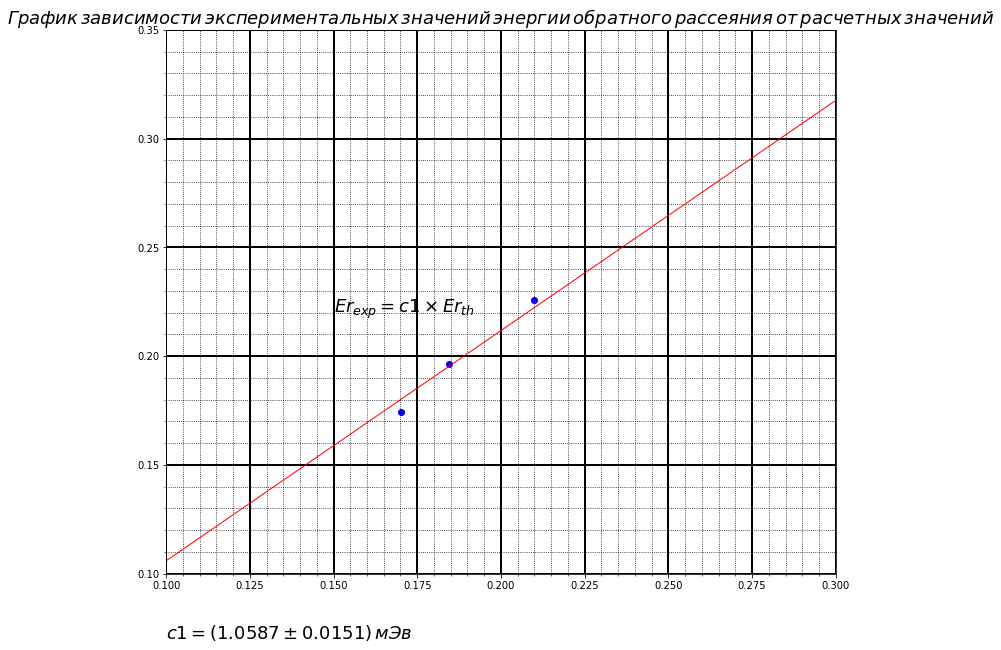

In [22]:
Nf = np.array([861, 1490, 674], dtype='float')
#Er_th = E_rev(Nr)
Er_th = E_rev(E(Nf))
Nr_exp = np.array([291, 327, 264], dtype='float')
Er_exp = E(Nr_exp)
plt.plot(Er_th, Er_exp, "bo")
plt.title(r'$График\/зависимости\/экспериментальных\/значений\/энергии\/обратного\/рассеяния\/от\/расчетных\/значений$', fontsize = 18, fontweight = 'bold')
fig = plt.gcf()
fig.set_size_inches(12, 10)
ax = plt.gca()
ax.minorticks_on()
ax.grid(which='major',
        color = 'k', 
        linewidth = 2)
ax.grid(which='minor', 
        color = 'k', 
        linestyle = ':')
ax.set_xlim(0.1, .3)
ax.set_ylim(0.1, .35)

m3 = sm.OLS(Er_exp, Er_th)
res3 = m3.fit()
param3 = res3.params[::-1]
error3 = res3.bse[::-1]
inter3 = np.linspace(0., 1.2, 5)
plt.plot(inter3, param3*inter3, "r", linewidth = '1')
plt.text(.15, .22, r'$Er_{exp} = c1 \times Er_{th}$' % (param3), fontsize = 18)
plt.text(.1, 0.07, r'$c1 = (%.4f \pm %.4f)\/мЭв$' % (param3, error3), fontsize = 18)